# 4.9 Intro to Data Viz with Python

### 01. Importing libaries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# shortcuts for importing dataframes
path = r"C:\Users\Asus\Documents\DA CareerFoundry\Part II - Data Immersion\Python - Anaconda\August 2025 Instacart Basket Analysis\02 Data"

In [4]:
#importing pkl file (note that this formula is different from the csv):
ords_prods_merge = pd.read_pickle(rf'{path}\Prepared Data\ords_prods_merge_groups.pkl')

### 02. Creating Bar Charts

The following line of code will create a bar chart:

<Axes: xlabel='orders_day_of_week'>

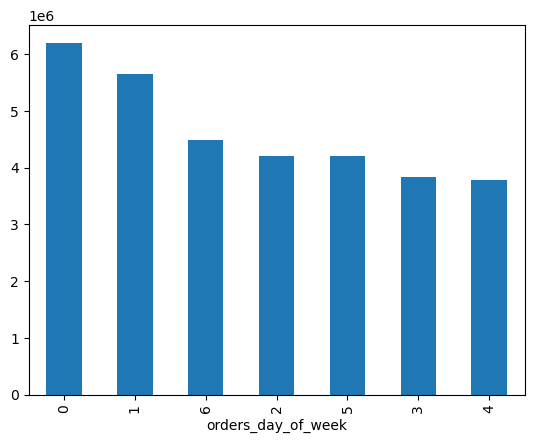

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

##### Note:
Ensure that you always run this function on the frequency of the column in question (rather than directly on the column itself) as, otherwise, it could take considerable time to produce the chart.

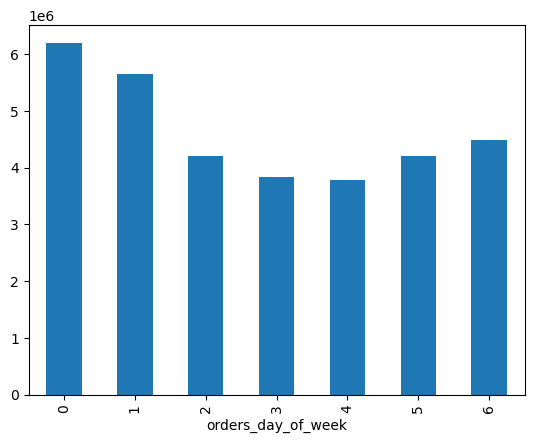

In [6]:
# in case I want to sort the x axis in ascendant order:

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

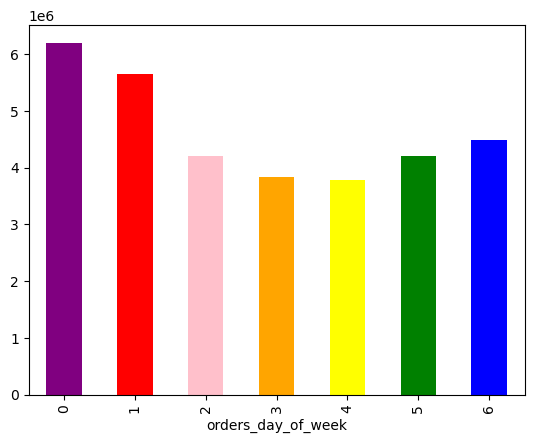

In [8]:
# adding color to the plot:

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### 03. Exporting Charts

The following code allows to export the chart:

In [10]:
# shortcut for exporting charts:
path2 = r"C:\Users\Asus\Documents\DA CareerFoundry\Part II - Data Immersion\Python - Anaconda\August 2025 Instacart Basket Analysis\04 Analysis"

In [11]:
bar.figure.savefig(os.path.join(path2, 'Visualizations', 'bar_orders_dow.png'))

### 04. Creating Histograms and Scatterplots

This will create a histogram:

<Axes: ylabel='Frequency'>

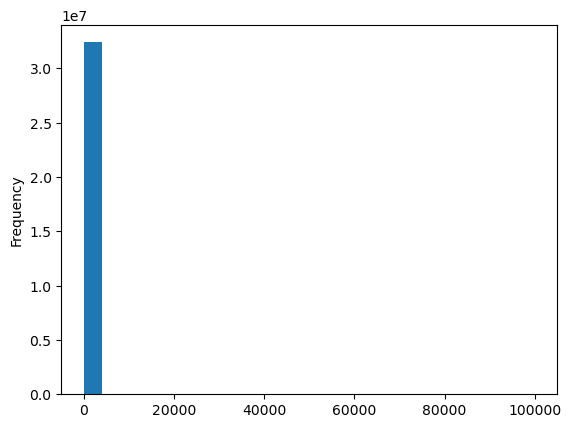

In [12]:
ords_prods_merge['prices'].plot.hist(bins = 25)

There's an outlier in the data, since there's a max value of 99999. Look at these stats:

In [13]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

So, histograms won't work for this data. Let's try a scatterplot instead:

<Axes: xlabel='prices', ylabel='prices'>

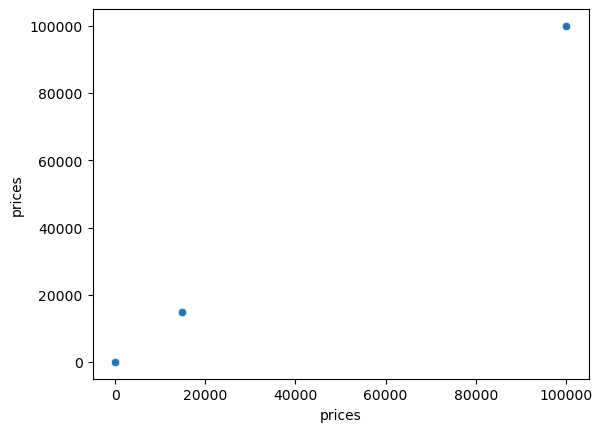

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

Again, here we're facing a weird plot, with extremely high values. Let's run some extra checks:

In [16]:
pd.set_option('display.max_columns', None)  # Show all columns

In [ ]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

In the meantime, it seems the number of columns keeps on growing, so I'll drop them while I wait for the instructions of Career Foundry.

In [18]:
ords_prods_merge.drop(['_merge', 'match', 'price_range_loc', 'busiest_day', 'orders_affluence', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_avg_price', 'spending_flag', 'user_ord_freq', 'order_frequency_flag'], axis = 1, inplace = True)

After 335 seconds, here we are, lighter.

It seems there are n rows above the threshold of 100, which are skewing the data and the scatterplot.

In [19]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0


In [20]:
# now, there's even one less. Ok. We proceed lighter.

This was a practical example of why you should be very pedantic about conducting your data quality checks—as well as how visualizations can help you explore your data. You should never leave an issue like this unfixed as it could very well blow up in your face at some point and spoil the results you’re trying to achieve. A first likely step would be to consult your client or a more senior stakeholder for guidance on how to treat these values. They might, for instance, be special values within the Instacart system.

For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:


In [21]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
ords_prods_merge['prices'].max()

25.0

#### Data Quality Reminder
Keep in mind that this step should have been completed during the data prep stages of your project. It isn’t generally a good idea to still be cleaning your data in the visualization stage. This example does demonstrate, however, just how easy it is for dirty data to slip through your net.

To keep your data cleaning tasks in one place, we recommend you copy the code from above into your notebook from Exercise 4.8. This will ensure your current notebook is strictly related to data visualization.

##### Will do this as soon as I have feedback regarding the previous exercises.

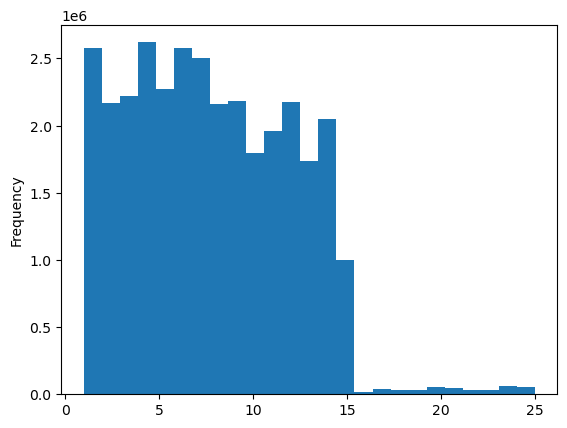

In [23]:
# let's try again the histogram:

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

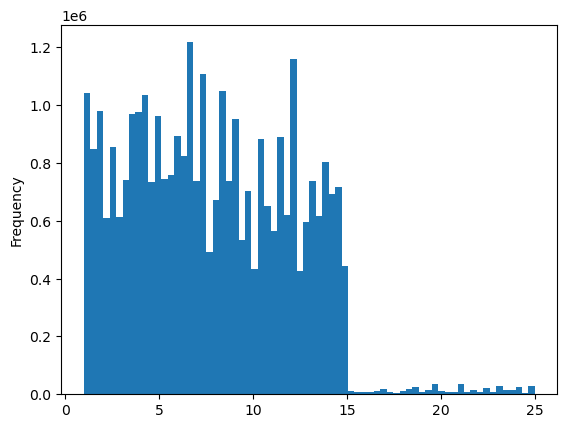

In [24]:
# now with more bins, to increase granularity:

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

##### Now exporting it as an image:

In [25]:
hist.figure.savefig(os.path.join(path2, 'Visualizations', 'hist_prices.png'))

### 05. Creating Line Charts

This takes a lot of computing power (RAM) so lets subset the dataframe:

But subsetting won't solve. We gotta sample the data.

````python
df= ords_prods_merge[:2000000]

### Sampling Data

A standard approach in machine learning is, when training a model, to normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.

A seed is a random but reproducible pattern; this is why we attribute it a number inside the brackets.

In [27]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

dev will store the boolean values - in this case, an output of true or false for every value based on whether it's less than or equal to 0.7

.random creates random numbers.

.rand makes sure the numbers generated by .random keep an uniform distribution (between 0 and 1).

len() represents the length of whatever you put inside it.

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
# splitting the dataframe into two samples:

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that:

70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. 

The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

In [33]:
len(ords_prods_merge)

32404859

In [34]:
len(big) + len(small)

32404859

In [35]:
# creating a smaller dataset, with only the columns that interest for this case:
df_2 = small[['orders_day_of_week','prices']]

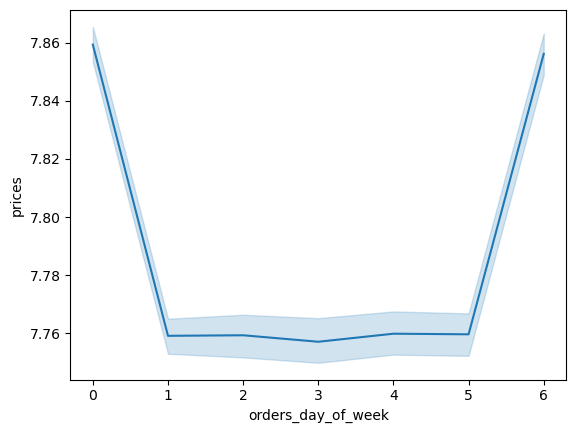

In [36]:
# finally, the line chart:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

After 412seconds, habemos line chart.